# Figure 2d. Statistical power and False Discovery Rate (FDR) comparisons.

Statistical power and FDR comparisons for trait-prioritized mode of *ColocBoost* (GWAS-xQTL) where there is a simulated “disease trait”, for which we lower the per-SNP heritability in the locus relative to other molecular traits to reflect expectations from real world applications.

In [5]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
sumstat <- readRDS("data/Figure_2d.rds")
sumstat <- sumstat %>% filter(heritability != 0.05)
colors_man <- c("#B24745FF", "#00A1D5FF", "#79AF97FF", "#DF8F44FF")

## Statistical power

In [6]:
p1 <- sumstat %>% 
  ggplot(aes(x = as.character(heritability), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05) + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ total_causal_var_number,
             labeller = labeller(total_causal_var_number = function(x) paste("Number of Causal Variants:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Heritability of Target Phenotype", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        axis.title.x = element_text(size = 16), 
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 16, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 16, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          #     axis.line = element_line(color = "black") # Keep the axis lines
        )

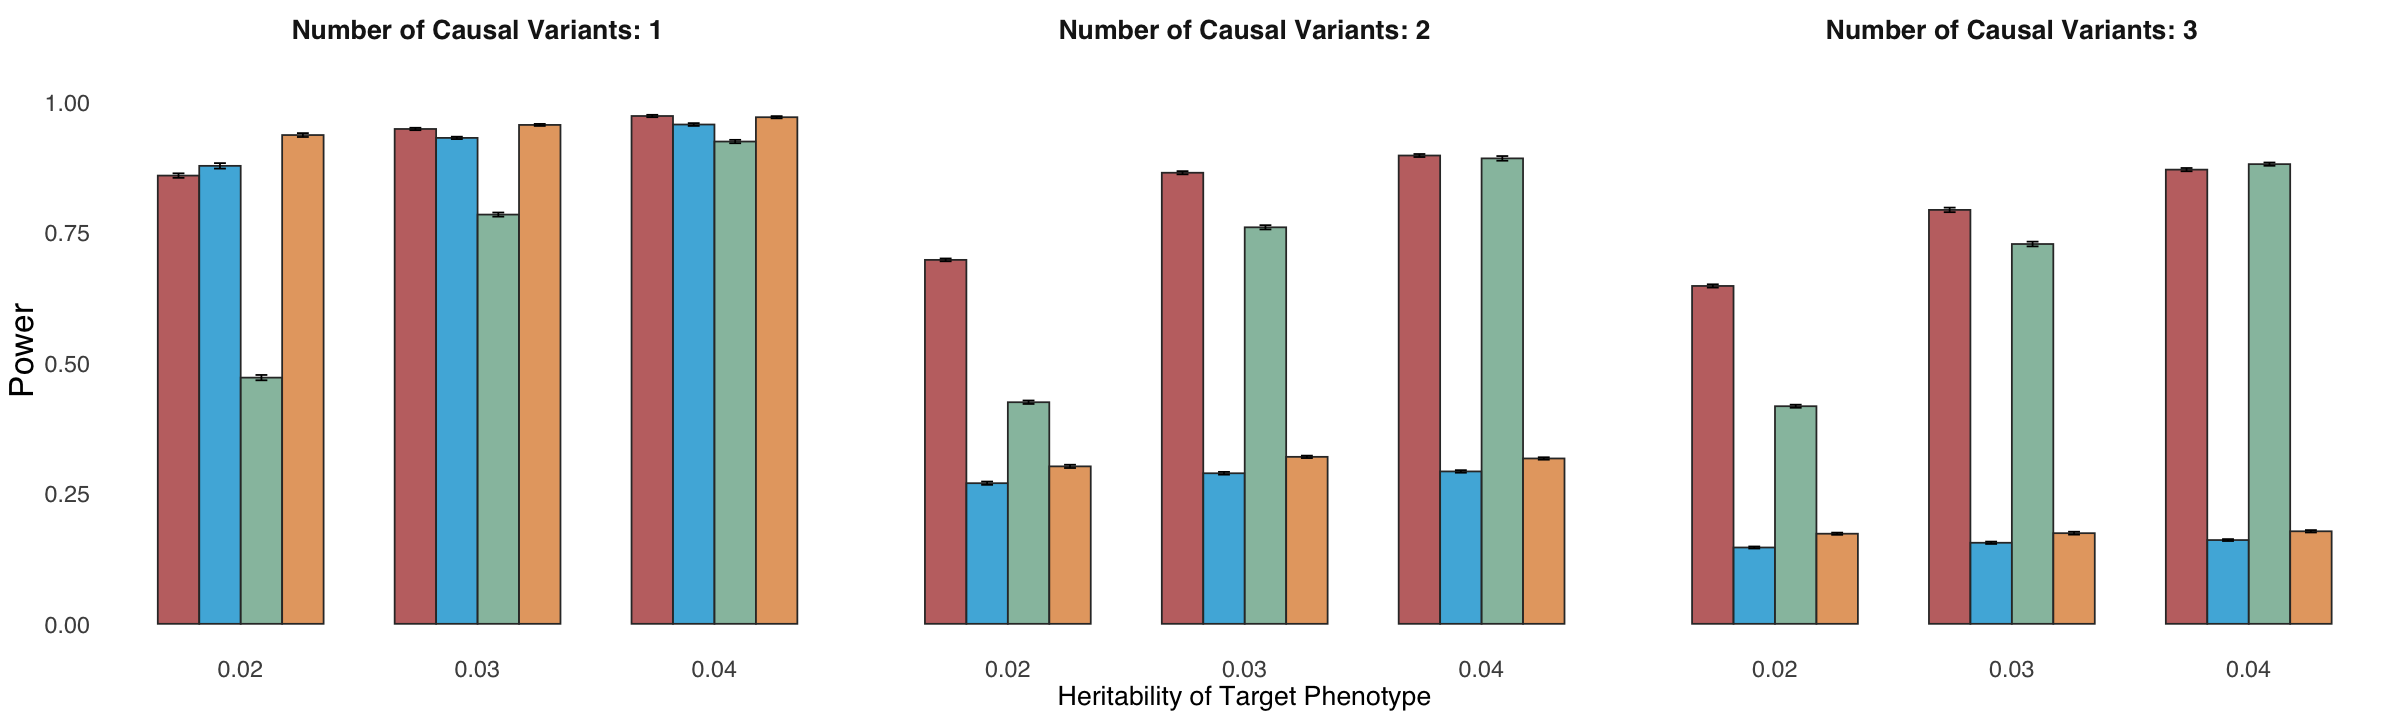

In [7]:
options(repr.plot.width = 20, repr.plot.height = 6)
p1

## FDR

In [8]:
p2 <- sumstat %>% 
  ggplot(aes(x = as.character(heritability), y =FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ total_causal_var_number,
             labeller = labeller(total_causal_var_number = function(x) paste("Number of Causal Variants:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
                    ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Heritability of Target Phenotype", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "bottom",
        axis.title.x = element_text(size = 16), 
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 16, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 16, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

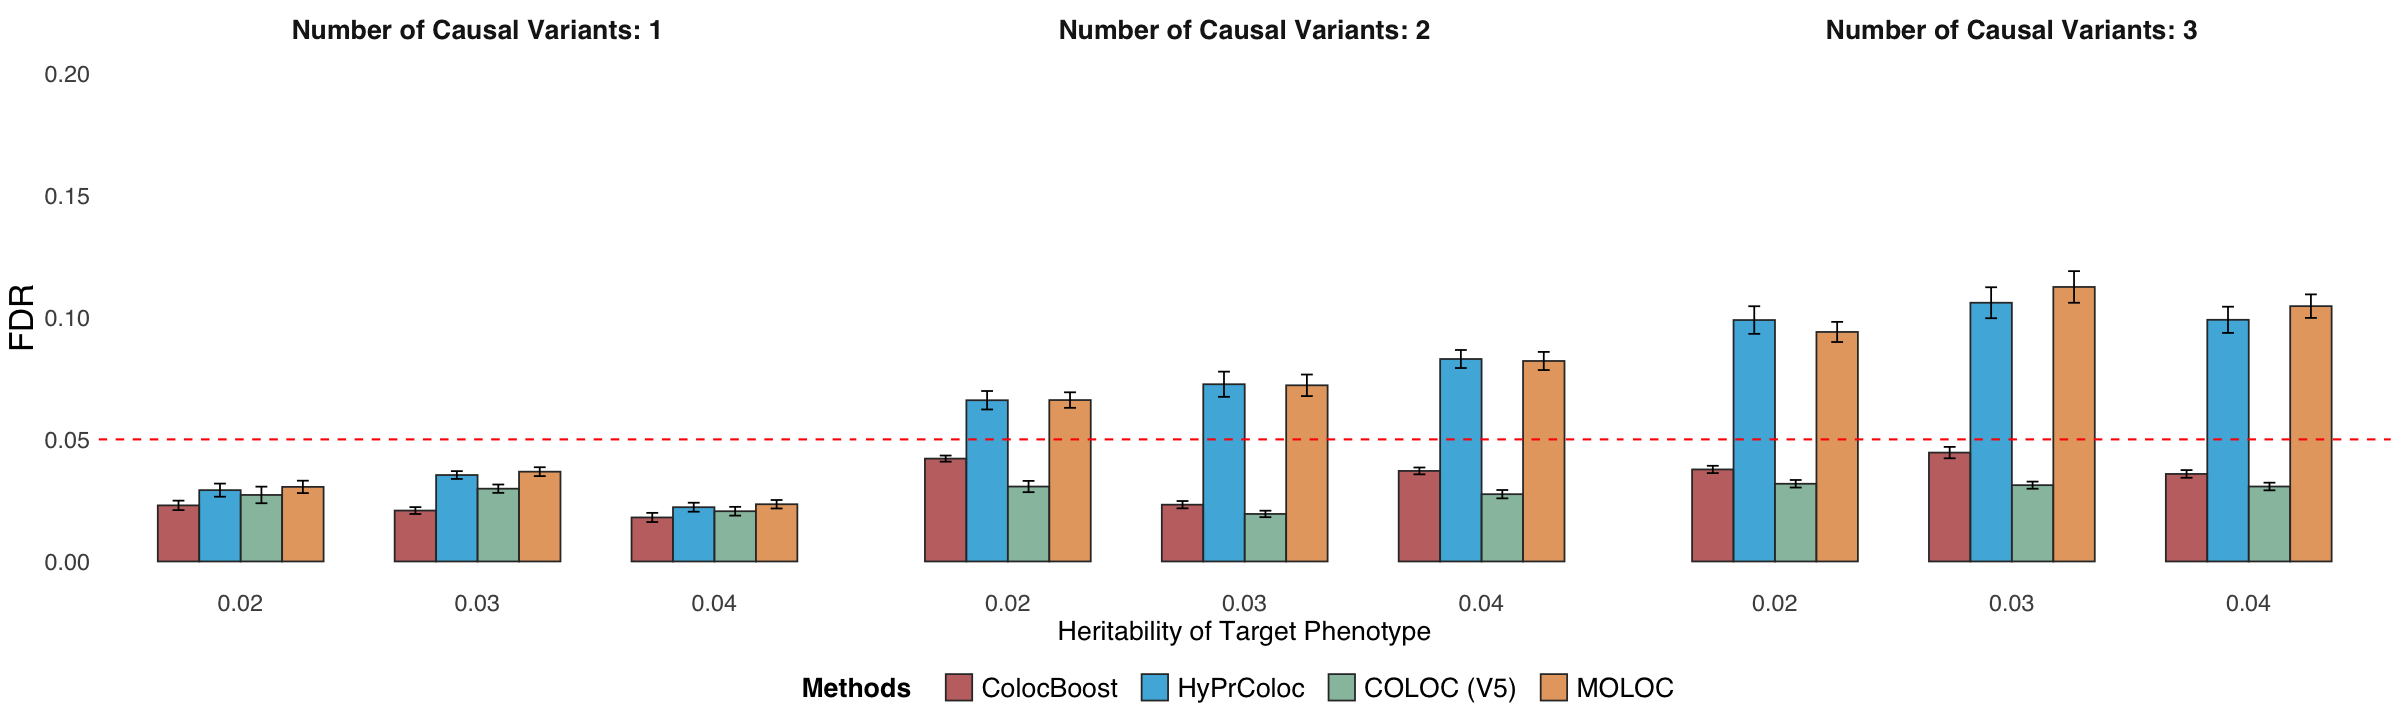

In [9]:
options(repr.plot.width = 20, repr.plot.height = 6)
p2